The following notebook contains an exploratory data analysis of a waterjet-cutting machine. The dataset contains data regarding the parameters, quality measures and used materials of a waterjet-cutting machine. In the notebook I will clean the data, explore the structure and insights of individual features and extract insights, using a combination of features. I will do this by the use of the pandas package and by visualizing the data. The goal is to get a better understanding of the machines function for future operations.

The features of the dataset are the following:\
**prod_day:** A time index for the day of production\
**part_type:** The type of product that is cut, using the machine\
**material:** The material that is cut, using the machine\
**part_number:** The part number of the product that is cut, using the machine\
**nozzle_diameter:** The diameter of the nozzle where the water is directed towards the workpeace (in mm)\
**thickness:** The thickness of the the cut material\
**standoff_distance:** The distance between the nozzle and the cut material (in mm)\
**traverse_speed:** the speed of the nozzle (in mm/min)\
**kerf:** The average acutal cut diameter of the workpeace\
**Ra:** A measure of cut quiality. The lower the Ra-value, the higher the quality of the cut\

++++Please note that this was a group assignment at the Chair of Production Management at the University of Mannheim. Since the data was provided by the chair, I won't publish the dataset.++++


In [1]:
# Importing packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats
from scipy.stats import kurtosis
from scipy.stats import skew

In [2]:
# Loading file
df = pd.read_csv("waterjet_data.csv")

### 1. Data Exploration & Cleaning 

In [3]:
df.head()

,prod_day,part_type,material,part_number,nozzle_diameter,thickness,standoff_distance,traverse_speed,kerf,Ra
0,80,C,MTL2,P0302,1.5,1.242383,64.535438,225.001446,1.492346,6.611027
1,14,B,MTL2,P0202,1.2,1.280226,54.298252,209.966809,1.205351,5.897230
2,39,C,MTL1,P0301,1.2,0.905913,50.878479,212.142485,1.379456,6.659806
3,24,B,MTL2,P0202,1.2,1.280859,59.564727,211.835422,1.223526,5.998701
4,22,C,MTL1,P0301,1.2,0.871954,58.572347,204.161588,1.426928,6.849167


In [4]:
df.describe()

,prod_day,nozzle_diameter,thickness,standoff_distance,traverse_speed,kerf,Ra
count,236549.000000,236549.000000,228627.000000,236549.000000,236549.000000,232151.000000,234180.000000
mean,44.582970,1.180076,1.059670,55.991325,208.636370,1.303005,6.232230
std,25.968384,0.186881,0.175595,7.504655,13.901855,0.141912,0.524807
min,0.000000,0.950000,0.815004,37.341903,156.697905,0.986430,5.068159
25%,22.000000,0.950000,0.898160,50.529990,198.953636,1.191225,5.749438
50%,45.000000,1.200000,0.925139,54.128510,207.480619,1.378491,6.302863
75%,67.000000,1.200000,1.246829,60.061555,217.240943,1.413392,6.675550
max,89.000000,1.500000,1.354984,91.051396,277.158776,1.614662,7.673708


**Main Results**  
Summary of basic statistics. Mean, Min, Max and std deviation do seem in correct ranges for all Columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236549 entries, 0 to 236548
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   prod_day           236549 non-null  int64  
 1   part_type          236549 non-null  object 
 2   material           233149 non-null  object 
 3   part_number        236549 non-null  object 
 4   nozzle_diameter    236549 non-null  float64
 5   thickness          228627 non-null  float64
 6   standoff_distance  236549 non-null  float64
 7   traverse_speed     236549 non-null  float64
 8   kerf               232151 non-null  float64
 9   Ra                 234180 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 18.0+ MB


In [6]:
# Looping over all columns to see what kind of data entries we have
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for the column {column}: \n {unique_values} \n")

Unique values for the column prod_day: 
 [80 14 39 24 22 21  3 87 28 40 25 30 77 55  8 63  7 86 75 41 18 69 42 53
 88 52 12 60 20 38 37 82 78 89 59 10 11 33 64 15 85 57 50  6 73  9 44 70
 19 32 48 13 56 34 29 83 71 46 79 23 67 31 58  5 54 49 74 84 65  1  2 61
 47 26 62 68 17 36 72 66 16 45 43 81 27 51 35 76  0  4] 

Unique values for the column part_type: 
 ['C' 'B' 'A'] 

Unique values for the column material: 
 ['MTL2' 'MTL1' 'MTL_2' 'MTL_1' nan] 

Unique values for the column part_number: 
 ['P0302' 'P0202' 'P0301' 'P0102' 'P0101' 'P0201'] 

Unique values for the column nozzle_diameter: 
 [1.5  1.2  0.95] 

Unique values for the column thickness: 
 [1.24238255 1.28022638 0.9059127  ... 0.92986432 0.90284989 0.87689813] 

Unique values for the column standoff_distance: 
 [64.53543773 54.29825185 50.87847932 ... 49.34766781 61.14376588
 53.53720027] 

Unique values for the column traverse_speed: 
 [225.00144567 209.96680862 212.14248531 ... 197.34171704 228.13047817
 199.06710915] 

U

**Main Results**\
MTL1/MTL2 sometimes are falsely entered as MTL_1/MTL_2

In [7]:
# We change MTL_1 to MTL1 and MTL_2 to MTL2
invalid_mtl1 = df.material.loc[df.material=="MTL_1"].index
df.loc[invalid_mtl1,"material"] = "MTL1"
invalid_mtl2 = df.material.loc[df.material=="MTL_2"].index
df.loc[invalid_mtl2,"material"] = "MTL2"

In [8]:
# It makes sense to take a look at the Part_numbers and how they relate to the Part_Types. This could also be done by looping.
df_material= df.groupby("material")
df_MTL1=df_material.get_group("MTL1")
print(f"The following part_numbers belong to Material 1: {df_MTL1.part_number.unique()}")

df_MTL2=df_material.get_group("MTL2")
print(f"The following part_numbers belong to Material 2: {df_MTL2.part_number.unique()}")

df_part_type= df.groupby("part_type")
df_part_type_A=df_part_type.get_group("A")
df_part_type_B=df_part_type.get_group("B")
df_part_type_C=df_part_type.get_group("C")
print(f"The following part_types belong to A: {df_part_type_A.part_number.unique()}")
print(f"The following part_types belong to B: {df_part_type_B.part_number.unique()}")
print(f"The following part_types belong to C: {df_part_type_C.part_number.unique()}")

The following part_numbers belong to Material 1: ['P0301' 'P0101' 'P0201']
The following part_numbers belong to Material 2: ['P0302' 'P0202' 'P0102']
The following part_types belong to A: ['P0102' 'P0101']
The following part_types belong to B: ['P0202' 'P0201']
The following part_types belong to C: ['P0302' 'P0301']


**Main Results**\
The MTL_1/MTL_2 problem is fixed now

It can be seen, that the part number is dependend from the part type and the material. Knowing the relationship between the 3 features is important for the following analysis.
The relationship between the part type, material and part number can be displayed the following:
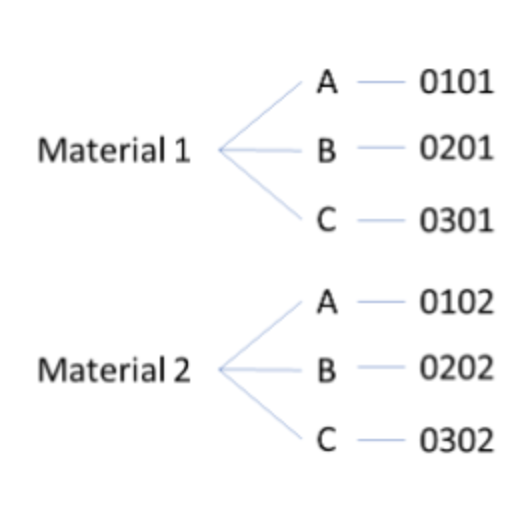

### 2. Removing Nan values and duplicates

In [9]:
df.isnull().sum()

prod_day                0
part_type               0
material             3400
part_number             0
nozzle_diameter         0
thickness            7922
standoff_distance       0
traverse_speed          0
kerf                 4398
Ra                   2369
dtype: int64

**NaN-Values for Thickness**\
There are quite a lot nan values for the thickness. Since I don't want to delete all those rows, I fill them with the average of the respective part_number to be more precise

In [10]:
# Looping over all unique values of part_number (P0101....P0302) and calculate for each a mean of the respective group to fill nan values
for part_number in df["part_number"].unique():
    part_number_mean_of_group = df.loc[df["part_number"] == part_number, "thickness"].mean()
    df.loc[df["part_number"] == part_number, "thickness"] = df.loc[df["part_number"] == part_number, "thickness"].fillna(part_number_mean_of_group)
df.isnull().sum() # Part_number is now zero

prod_day                0
part_type               0
material             3400
part_number             0
nozzle_diameter         0
thickness               0
standoff_distance       0
traverse_speed          0
kerf                 4398
Ra                   2369
dtype: int64

**NaN-Values for Material**\
We can't estimate materials but luckily we know what kind of material coressponds to the Part_numbers so therefore the material can be filled accordingly


In [11]:
df.loc[(df["material"].isnull()) & ((df["part_number"] == "P0101") | (df["part_number"]== "P0201") | (df["part_number"]=="P0301")), "material"] = "MTL1" # Replacing nan with MTL1 for Parts P0101/0201/0301
df.loc[(df["material"].isnull()) & ((df["part_number"] == "P0102") | (df["part_number"]== "P0202") | (df["part_number"]=="P0302")), "material"] = "MTL2" # Replacing nan with MTL2 for Parts P0102/0202/0302
df.isnull().sum()

prod_day                0
part_type               0
material                0
part_number             0
nozzle_diameter         0
thickness               0
standoff_distance       0
traverse_speed          0
kerf                 4398
Ra                   2369
dtype: int64

**NaN-Values for kerf & Ra**\
Dropping rows with missing kerf/ Ra values because they only make up a small proportion of total data. Additionally this aviods impurifications of the data

In [12]:
df.dropna(subset=['kerf'], axis=0, inplace=True)
df.dropna(subset=['Ra'], axis=0, inplace=True)
df.isnull().sum()

prod_day             0
part_type            0
material             0
part_number          0
nozzle_diameter      0
thickness            0
standoff_distance    0
traverse_speed       0
kerf                 0
Ra                   0
dtype: int64

**Main Resulta**\
All NaN-Values are taken care of

In [13]:
df.duplicated().sum()

0

**Main Results**\
There are no duplicated rows in the dataset

### 3. Univariate Analysis
As a next step, and first part of the analysis, we investigate the variables individually.

In [14]:
# Generall overview of cleaned data. All values seem to be in logical relation (e.g. no multiple units).
df.describe()

,prod_day,nozzle_diameter,thickness,standoff_distance,traverse_speed,kerf,Ra
count,229828.000000,229828.000000,229828.000000,229828.000000,229828.000000,229828.000000,229828.000000
mean,44.566602,1.176863,1.054937,55.843402,208.417236,1.300785,6.232402
std,25.990585,0.185005,0.175186,7.377247,13.752452,0.140876,0.524841
min,0.000000,0.950000,0.815004,37.341903,156.697905,0.986430,5.068159
25%,22.000000,0.950000,0.898675,50.491766,198.862908,1.190666,5.749680
50%,45.000000,1.200000,0.922164,54.045861,207.318843,1.377638,6.303014
75%,67.000000,1.200000,1.246440,59.803011,216.929515,1.412122,6.675693
max,89.000000,1.500000,1.354984,91.051396,277.158776,1.614662,7.673708


##### Grouping Data
Based on the findings on material and part type, the data can be grouped in three different ways:

1. Group data by material
2. Group data by part_type
3. Group data by material and part type

Note: Rounding applied due to higher ease of comparision.


In [15]:
# Grouping and describing the data by material
df_MTL = df.groupby(["material"])
round(df_MTL.describe().T,3)

material                       MTL1        MTL2
prod_day          count  128098.000  101730.000
                  mean       44.542      44.598
                  std        26.006      25.971
                  min         0.000       0.000
                  25%        22.000      22.000
                  50%        45.000      45.000
                  75%        67.000      67.000
                  max        89.000      89.000
nozzle_diameter   count  128098.000  101730.000
                  mean        1.125       1.242
                  std         0.115       0.230
                  min         0.950       0.950
                  25%         0.950       0.950
                  50%         1.200       1.200
                  75%         1.200       1.500
                  max         1.200       1.500
thickness         count  128098.000  101730.000
                  mean        0.900       1.250
                  std         0.018       0.025
                  min         0.815       1.147
                  25%         0.889       1.234
                  50%         0.900       1.250
                  75%         0.911       1.267
                  max         0.982       1.355
standoff_distance count  128098.000  101730.000
                  mean       56.003      55.642
                  std         7.520       7.189
                  min        37.965      37.342
                  25%        50.536      50.442
                  50%        54.127      53.937
                  75%        60.069      59.501
                  max        91.051      88.794
traverse_speed    count  128098.000  101730.000
                  mean      208.650     208.124
                  std        13.911      13.544
                  min       159.997     156.698
                  25%       198.944     198.765
                  50%       207.490     207.115
                  75%       217.278     216.488
                  max       277.159     276.187
kerf              count  128098.000  101730.000
                  mean        1.337       1.255
                  std         0.101       0.169
                  min         1.139       0.986
                  25%         1.202       1.059
                  50%         1.385       1.233
                  75%         1.406       1.426
                  max         1.503       1.615
Ra                count  128098.000  101730.000
                  mean        6.389       6.035
                  std         0.589       0.340
                  min         5.068       5.114
                  25%         5.710       5.766
                  50%         6.639       6.029
                  75%         6.789       6.302
                  max         7.674       7.374

**Main Results**
* MTL 1 is used more often than MTL2
* Nozzle Diamter on average higher for MTL2, but with a higher standard deviation
* MTL1 on average way thinner than MTL2
* RA and kerf values on averager higher for MTL1 than for MTL2

In [16]:
# Grouping and describing data by part_type
df_part_type = df.groupby(["part_type"])
round(df_part_type.describe().T ,3)

part_type                        A          B          C
prod_day          count  69706.000  67231.000  92891.000
                  mean      44.542     44.531     44.611
                  std       26.009     25.886     26.052
                  min        0.000      0.000      0.000
                  25%       22.000     22.000     22.000
                  50%       45.000     45.000     45.000
                  75%       67.000     67.000     67.000
                  max       89.000     89.000     89.000
nozzle_diameter   count  69706.000  67231.000  92891.000
                  mean       0.950      1.200      1.330
                  std        0.000      0.000      0.149
                  min        0.950      1.200      1.200
                  25%        0.950      1.200      1.200
                  50%        0.950      1.200      1.200
                  75%        0.950      1.200      1.500
                  max        0.950      1.200      1.500
thickness         count  69706.000  67231.000  92891.000
                  mean       1.056      1.057      1.052
                  std        0.175      0.175      0.175
                  min        0.815      0.828      0.817
                  25%        0.899      0.899      0.898
                  50%        0.923      0.923      0.921
                  75%        1.247      1.247      1.246
                  max        1.351      1.355      1.353
standoff_distance count  69706.000  67231.000  92891.000
                  mean      55.981     56.010     55.620
                  std        7.493      7.543      7.159
                  min       37.342     37.673     38.917
                  25%       50.549     50.512     50.440
                  50%       54.098     54.129     53.948
                  75%       60.015     60.102     59.464
                  max       90.260     90.060     91.051
traverse_speed    count  69706.000  67231.000  92891.000
                  mean     208.598    208.638    208.122
                  std       13.885     13.968     13.488
                  min      156.698    159.903    161.602
                  25%      198.983    198.898    198.741
                  50%      207.395    207.469    207.149
                  75%      217.160    217.347    216.470
                  max      274.444    277.159    277.085
kerf              count  69706.000  67231.000  92891.000
                  mean       1.123      1.323      1.418
                  std        0.073      0.091      0.036
                  min        0.986      1.143      1.321
                  25%        1.045      1.226      1.391
                  50%        1.169      1.372      1.412
                  75%        1.187      1.400      1.440
                  max        1.251      1.498      1.615
Ra                count  69706.000  67231.000  92891.000
                  mean       5.597      6.413      6.579
                  std        0.195      0.423      0.277
                  min        5.068      5.485      5.664
                  25%        5.456      5.983      6.373
                  50%        5.569      6.552      6.602
                  75%        5.709      6.741      6.757
                  max        6.506      7.674      7.630

**Main Results**
* Type C is produced the most often
* Nozzle diameter seems to be constant for type A and B based on the standard deviation
* Average Kerf and RA values: A > B > C

In [17]:
# Grouping and describing data by material and part_type
df_MTL_part_type = df.groupby(["material","part_type"])
round(df_MTL_part_type.describe().T,3)

material                      MTL1                             MTL2  \
part_type                        A          B          C          A   
prod_day          count  38537.000  37033.000  52528.000  31169.000   
                  mean      44.580     44.424     44.597     44.494   
                  std       26.093     25.902     26.016     25.905   
                  min        0.000      0.000      0.000      0.000   
                  25%       22.000     22.000     22.000     22.000   
                  50%       45.000     44.000     45.000     45.000   
                  75%       67.000     67.000     67.000     67.000   
                  max       89.000     89.000     89.000     89.000   
nozzle_diameter   count  38537.000  37033.000  52528.000  31169.000   
                  mean       0.950      1.200      1.200      0.950   
                  std        0.000      0.000      0.000      0.000   
                  min        0.950      1.200      1.200      0.950   
                  25%        0.950      1.200      1.200      0.950   
                  50%        0.950      1.200      1.200      0.950   
                  75%        0.950      1.200      1.200      0.950   
                  max        0.950      1.200      1.200      0.950   
thickness         count  38537.000  37033.000  52528.000  31169.000   
                  mean       0.900      0.900      0.900      1.250   
                  std        0.018      0.017      0.018      0.025   
                  min        0.815      0.828      0.817      1.155   
                  25%        0.888      0.889      0.889      1.233   
                  50%        0.900      0.900      0.900      1.250   
                  75%        0.911      0.911      0.911      1.266   
                  max        0.973      0.969      0.982      1.351   
standoff_distance count  38537.000  37033.000  52528.000  31169.000   
                  mean      56.008     56.028     55.982     55.946   
                  std        7.545      7.543      7.485      7.429   
                  min       39.181     37.965     38.917     37.342   
                  25%       50.551     50.532     50.527     50.542   
                  50%       54.074     54.155     54.157     54.141   
                  75%       60.031     60.130     60.043     59.987   
                  max       90.260     90.060     91.051     88.687   
traverse_speed    count  38537.000  37033.000  52528.000  31169.000   
                  mean     208.636    208.638    208.669    208.552   
                  std       13.953     13.963     13.844     13.801   
                  min      165.146    159.997    162.504    156.698   
                  25%      198.964    198.906    198.957    199.011   
                  50%      207.437    207.424    207.577    207.368   
                  75%      217.231    217.315    217.272    217.078   
                  max      274.444    277.159    277.085    272.977   
kerf              count  38537.000  37033.000  52528.000  31169.000   
                  mean       1.187      1.401      1.401      1.044   
                  std        0.015      0.025      0.025      0.017   
                  min        1.139      1.327      1.332      0.986   
                  25%        1.176      1.383      1.383      1.032   
                  50%        1.185      1.397      1.397      1.042   
                  75%        1.196      1.416      1.416      1.054   
                  max        1.251      1.498      1.503      1.112   
Ra                count  38537.000  37033.000  52528.000  31169.000   
                  mean       5.535      6.756      6.756      5.673   
                  std        0.184      0.183      0.182      0.182   
                  min        5.068      6.277      6.270      5.114   
                  25%        5.404      6.625      6.626      5.543   
                  50%        5.499      6.721      6.722      5.639   
                  75%   

**Main Results**
* Nozzle diameter and thickness seem to be fairly consistent
* Diffult to get insights to standoff distance and traverse speed which could be insightful

##### Mean and median grouped by material and part type

In [18]:
# Mean grouped by material and part_type seperated for a better overview.
df_MTL_part_type.mean(numeric_only=True)

prod_day  nozzle_diameter  thickness  standoff_distance  \
material part_type                                                             
MTL1     A          44.580403             0.95   0.899825          56.008156   
         B          44.424027             1.20   0.900046          56.027705   
         C          44.596710             1.20   0.899991          55.982212   
MTL2     A          44.494145             0.95   1.249897          55.946314   
         B          44.663157             1.20   1.249656          55.988365   
         C          44.628769             1.50   1.250559          55.148431   

                    traverse_speed      kerf        Ra  
material part_type                                      
MTL1     A              208.635988  1.187301  5.535374  
         B              208.637690  1.401207  6.756474  
         C              208.669253  1.401059  6.755789  
MTL2     A              208.551830  1.043706  5.672761  
         B              208.638363  1.226301  5.991395  
         C              207.408769  1.440747  6.348405

In [19]:
# Median grouped by material and part_type seperated for a better overview.
df_MTL_part_type.median(numeric_only=True)

prod_day  nozzle_diameter  thickness  standoff_distance  \
material part_type                                                            
MTL1     A              45.0             0.95   0.899832          54.074259   
         B              44.0             1.20   0.900058          54.154944   
         C              45.0             1.20   0.899999          54.157491   
MTL2     A              45.0             0.95   1.249879          54.141051   
         B              45.0             1.20   1.249686          54.095733   
         C              45.0             1.50   1.250090          53.694426   

                    traverse_speed      kerf        Ra  
material part_type                                      
MTL1     A              207.436751  1.185321  5.498916  
         B              207.424029  1.396712  6.720636  
         C              207.577222  1.396831  6.721593  
MTL2     A              207.368135  1.042369  5.639365  
         B              207.545597  1.222594  5.958069  
         C              206.640088  1.436781  6.336957

**Main Results**\
Median and mean are quite close together which is a sign for low an amount of outliers and this is good in production.

##### Kurtosis and skewness of the dataset

In [20]:
# The kurtosis can only be calculated for float values
df_float_columns = df.select_dtypes(include='float')
kurtosis = df_float_columns.apply(lambda x: kurtosis(x))
print (kurtosis)

nozzle_diameter     -0.679536
thickness           -1.883573
standoff_distance    0.723309
traverse_speed       0.250168
kerf                -0.973818
Ra                  -1.219967
dtype: float64


In [21]:
#Similar to kurtosis, skewness can only be calcualted for float values
df_float_columns = df.select_dtypes(include='float')
skewness = df_float_columns.apply(lambda x: skew(x))
print (skewness)

nozzle_diameter      0.377589
thickness            0.240853
standoff_distance    0.995562
traverse_speed       0.410005
kerf                -0.577404
Ra                  -0.147449
dtype: float64


No insightful findings here

### 4. Data Visualization
##### 4.1 Univariate

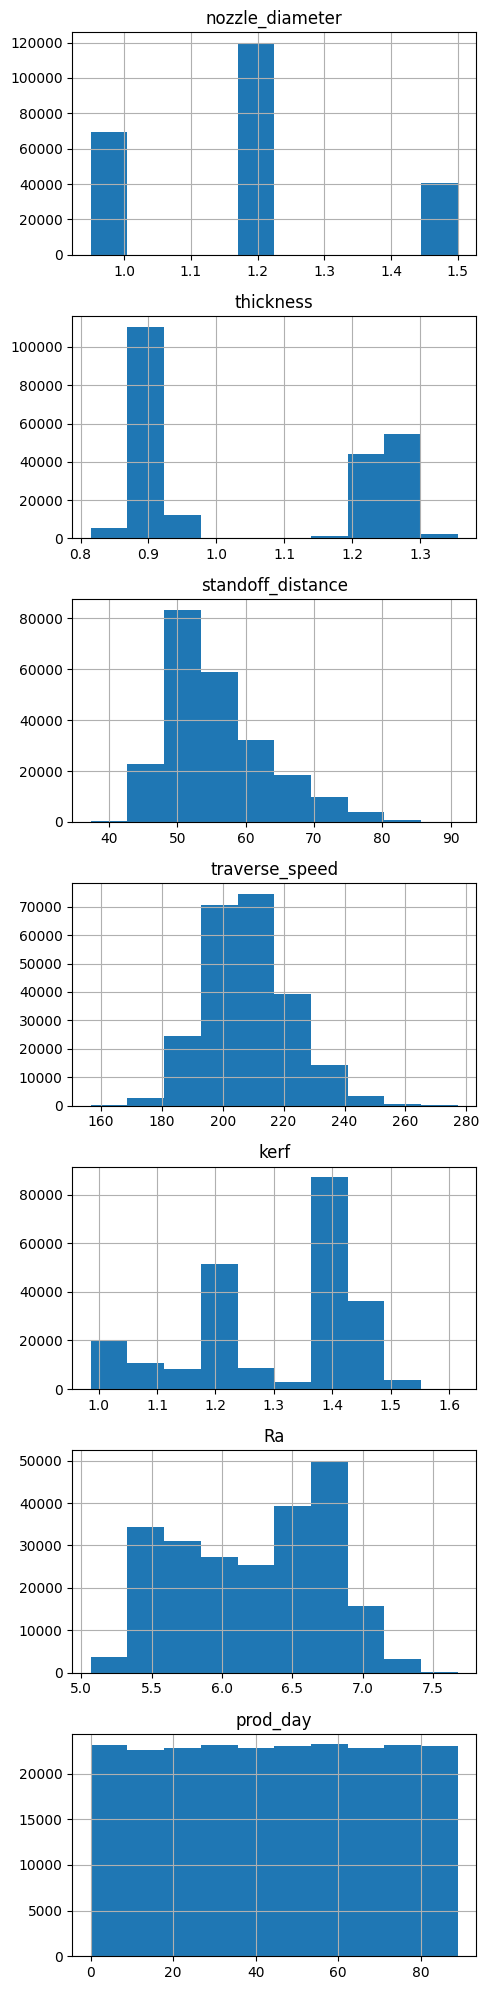

In [22]:
#Hisograms of all numberic columns
numeric_columns = ['nozzle_diameter', 'thickness', 'standoff_distance', 'traverse_speed', 'kerf', 'Ra', 'prod_day']
fig, ax = plt.subplots(nrows=7, figsize=(5, 20))
for i in range(7): #Loop over all numeric columns and create a histogram
  df.hist(numeric_columns[i], ax=ax[i])

plt.tight_layout()

**Main Results**
* Not all of the variables are normal distributed.
* There seem to be 3 distinct nozzle diameters used. Further, there are two spikes in for thickness, kerf and the Ra-value.
* The two spikes for the thickness indicates that the 2 materials have a different thickness.

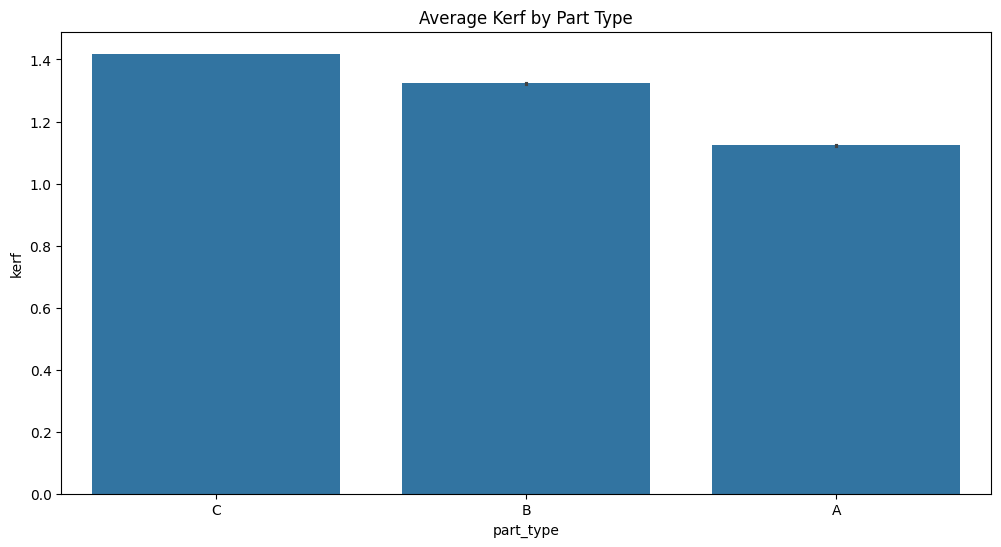

In [23]:
#Average kerf by part type
plt.figure(figsize=(12, 6))
sns.barplot(x='part_type', y='kerf', data=df)
plt.title('Average Kerf by Part Type')
plt.show()

**Main Result**
There are different kerfs for the material types

##### 4.2 Bivariate

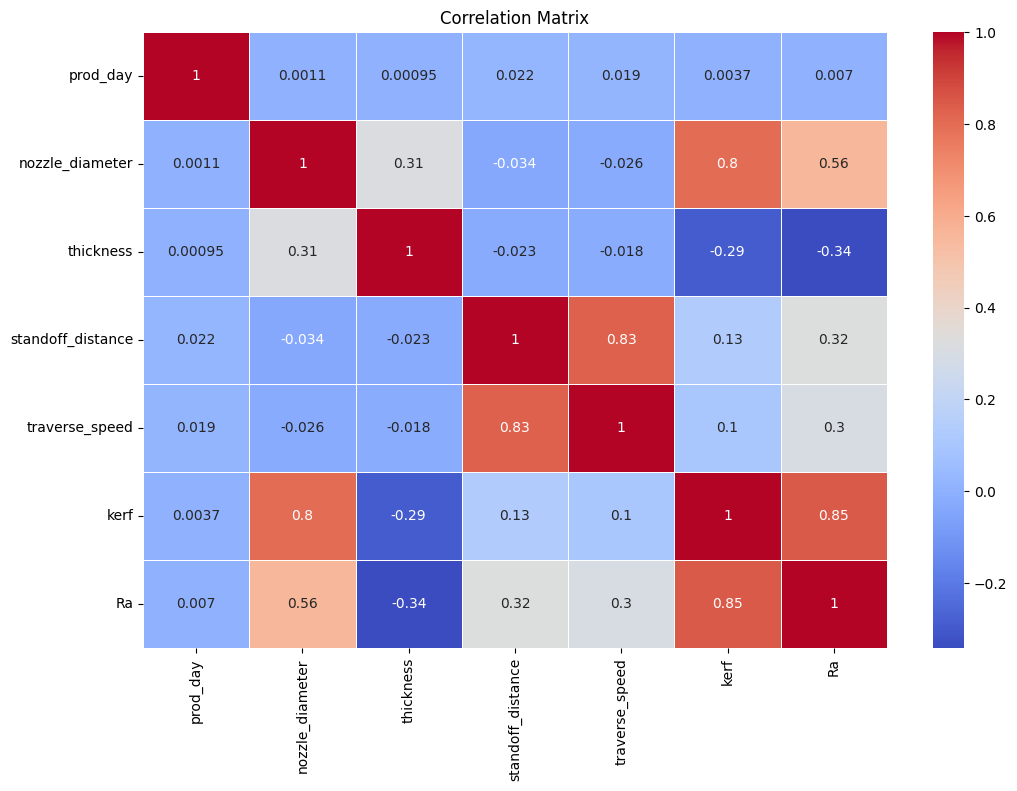

In [25]:
#Creating a heatmap with all correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

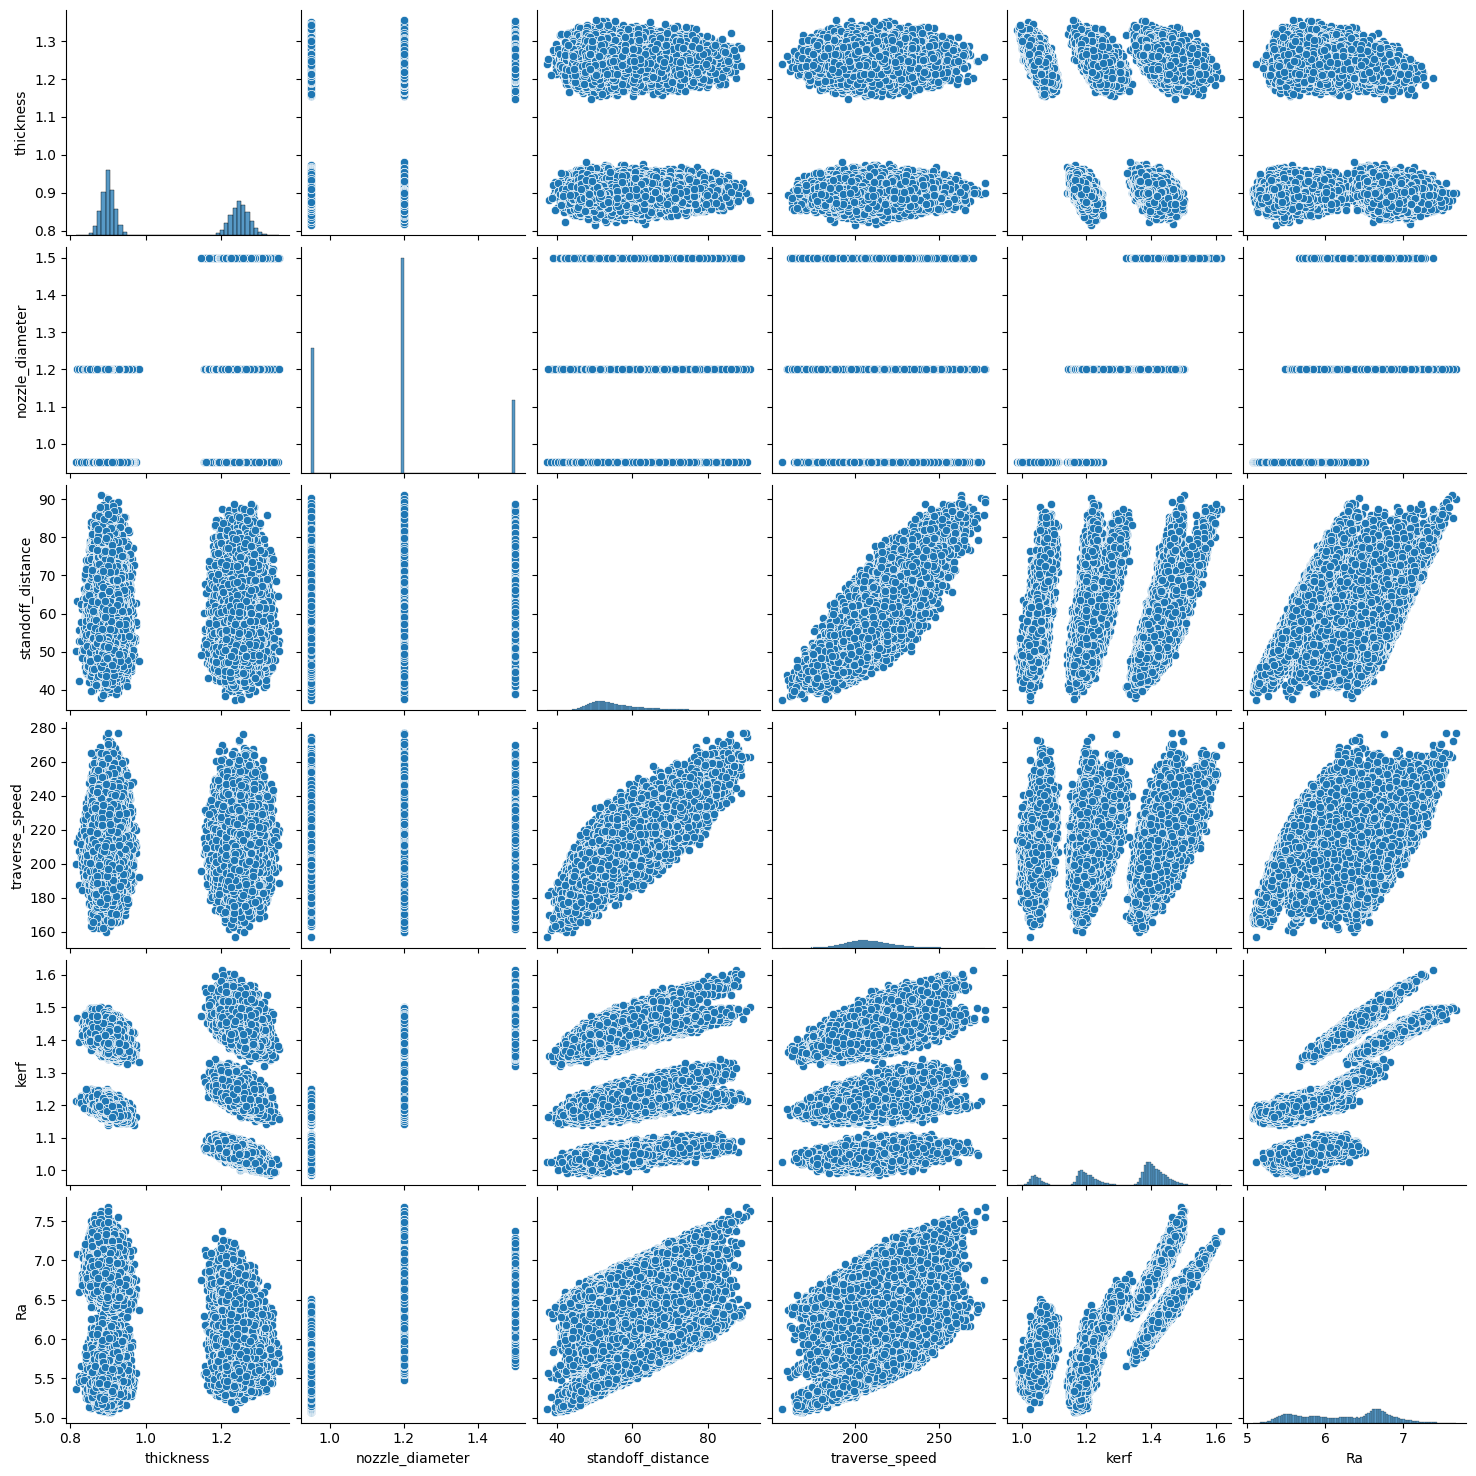

In [26]:
#Creating a pairplot, using the package seaborn
sns.pairplot(df[['thickness', 'nozzle_diameter', 'standoff_distance', 'traverse_speed', 'kerf', 'Ra']])
plt.show()

**Main Results**
* The nozzle diameter has a positive effect on the kerf, which makes sence
* Further the standoff distance and the traverse speed negatively impact the cut quality (Ra-value)
* It looks like a higher standoff distance enables a higher traverse speed
* Within many plot there are distinct groups which partly can be explained by the different nozzle diameter, thickness of the material, part types and part numbers

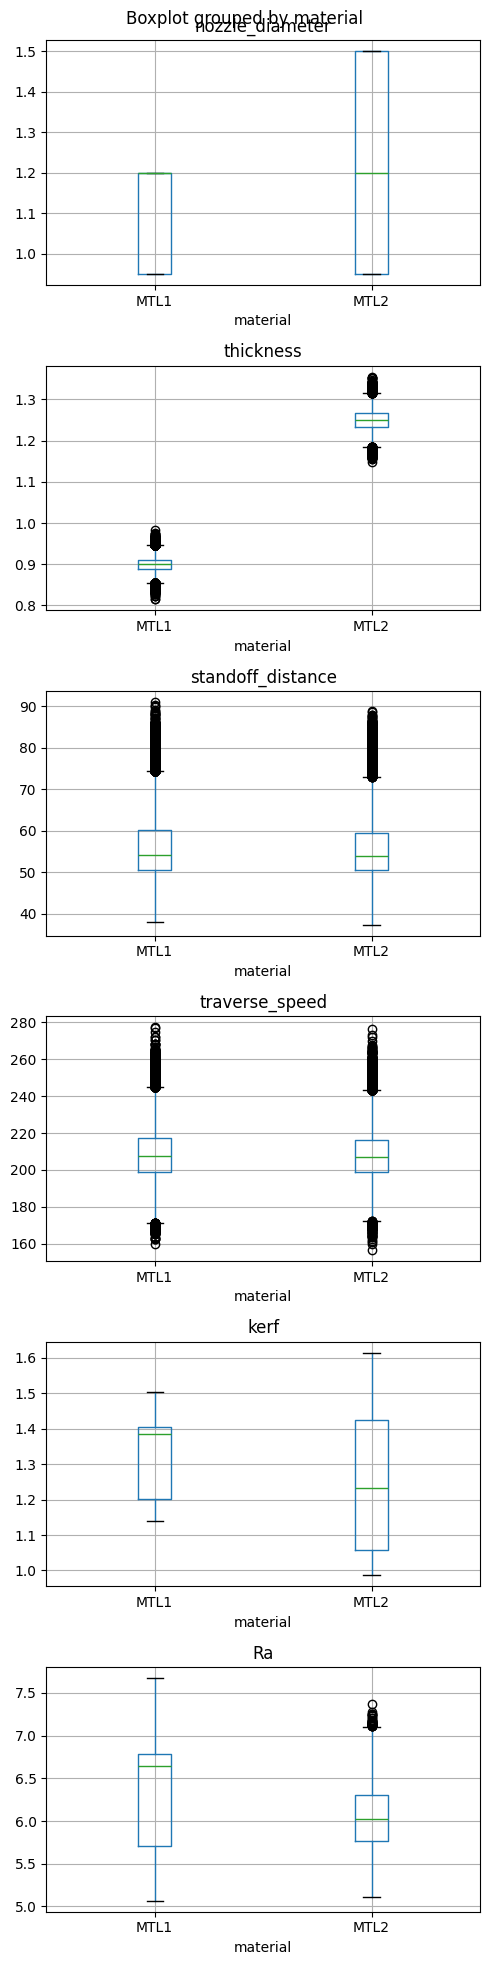

In [27]:
# To get an overview how the used metals affect the other variables we create a conditional boxplot for each relevant variable
numeric_columns = ['nozzle_diameter', 'thickness', 'standoff_distance', 'traverse_speed', 'kerf', 'Ra'] #Production Day gets excluded, since in this case it does not matter when which metal was used

fig, ax = plt.subplots(nrows=6, figsize=(5, 20))
for i in range(6): #Loop over all numeric columns and create two seperate boxplots for each material
  df.boxplot(column=numeric_columns[i], by='material', ax=ax[i])

plt.tight_layout()

**Main Results**
* We can see that Products made from MTL2 require a wider range of nozzle diameters which leads to a wide range of kerf
* From the median of the boxplots of the thickness the anticipated thickness of the materials can be determined
* The median Ra of MTL2 is lower (higher quality) that the median of MTL1 and has a lower variation. This indicates the MTL2 might be more suitable for waterjet cutting. But there are also so heavy negative outliers for MTL2

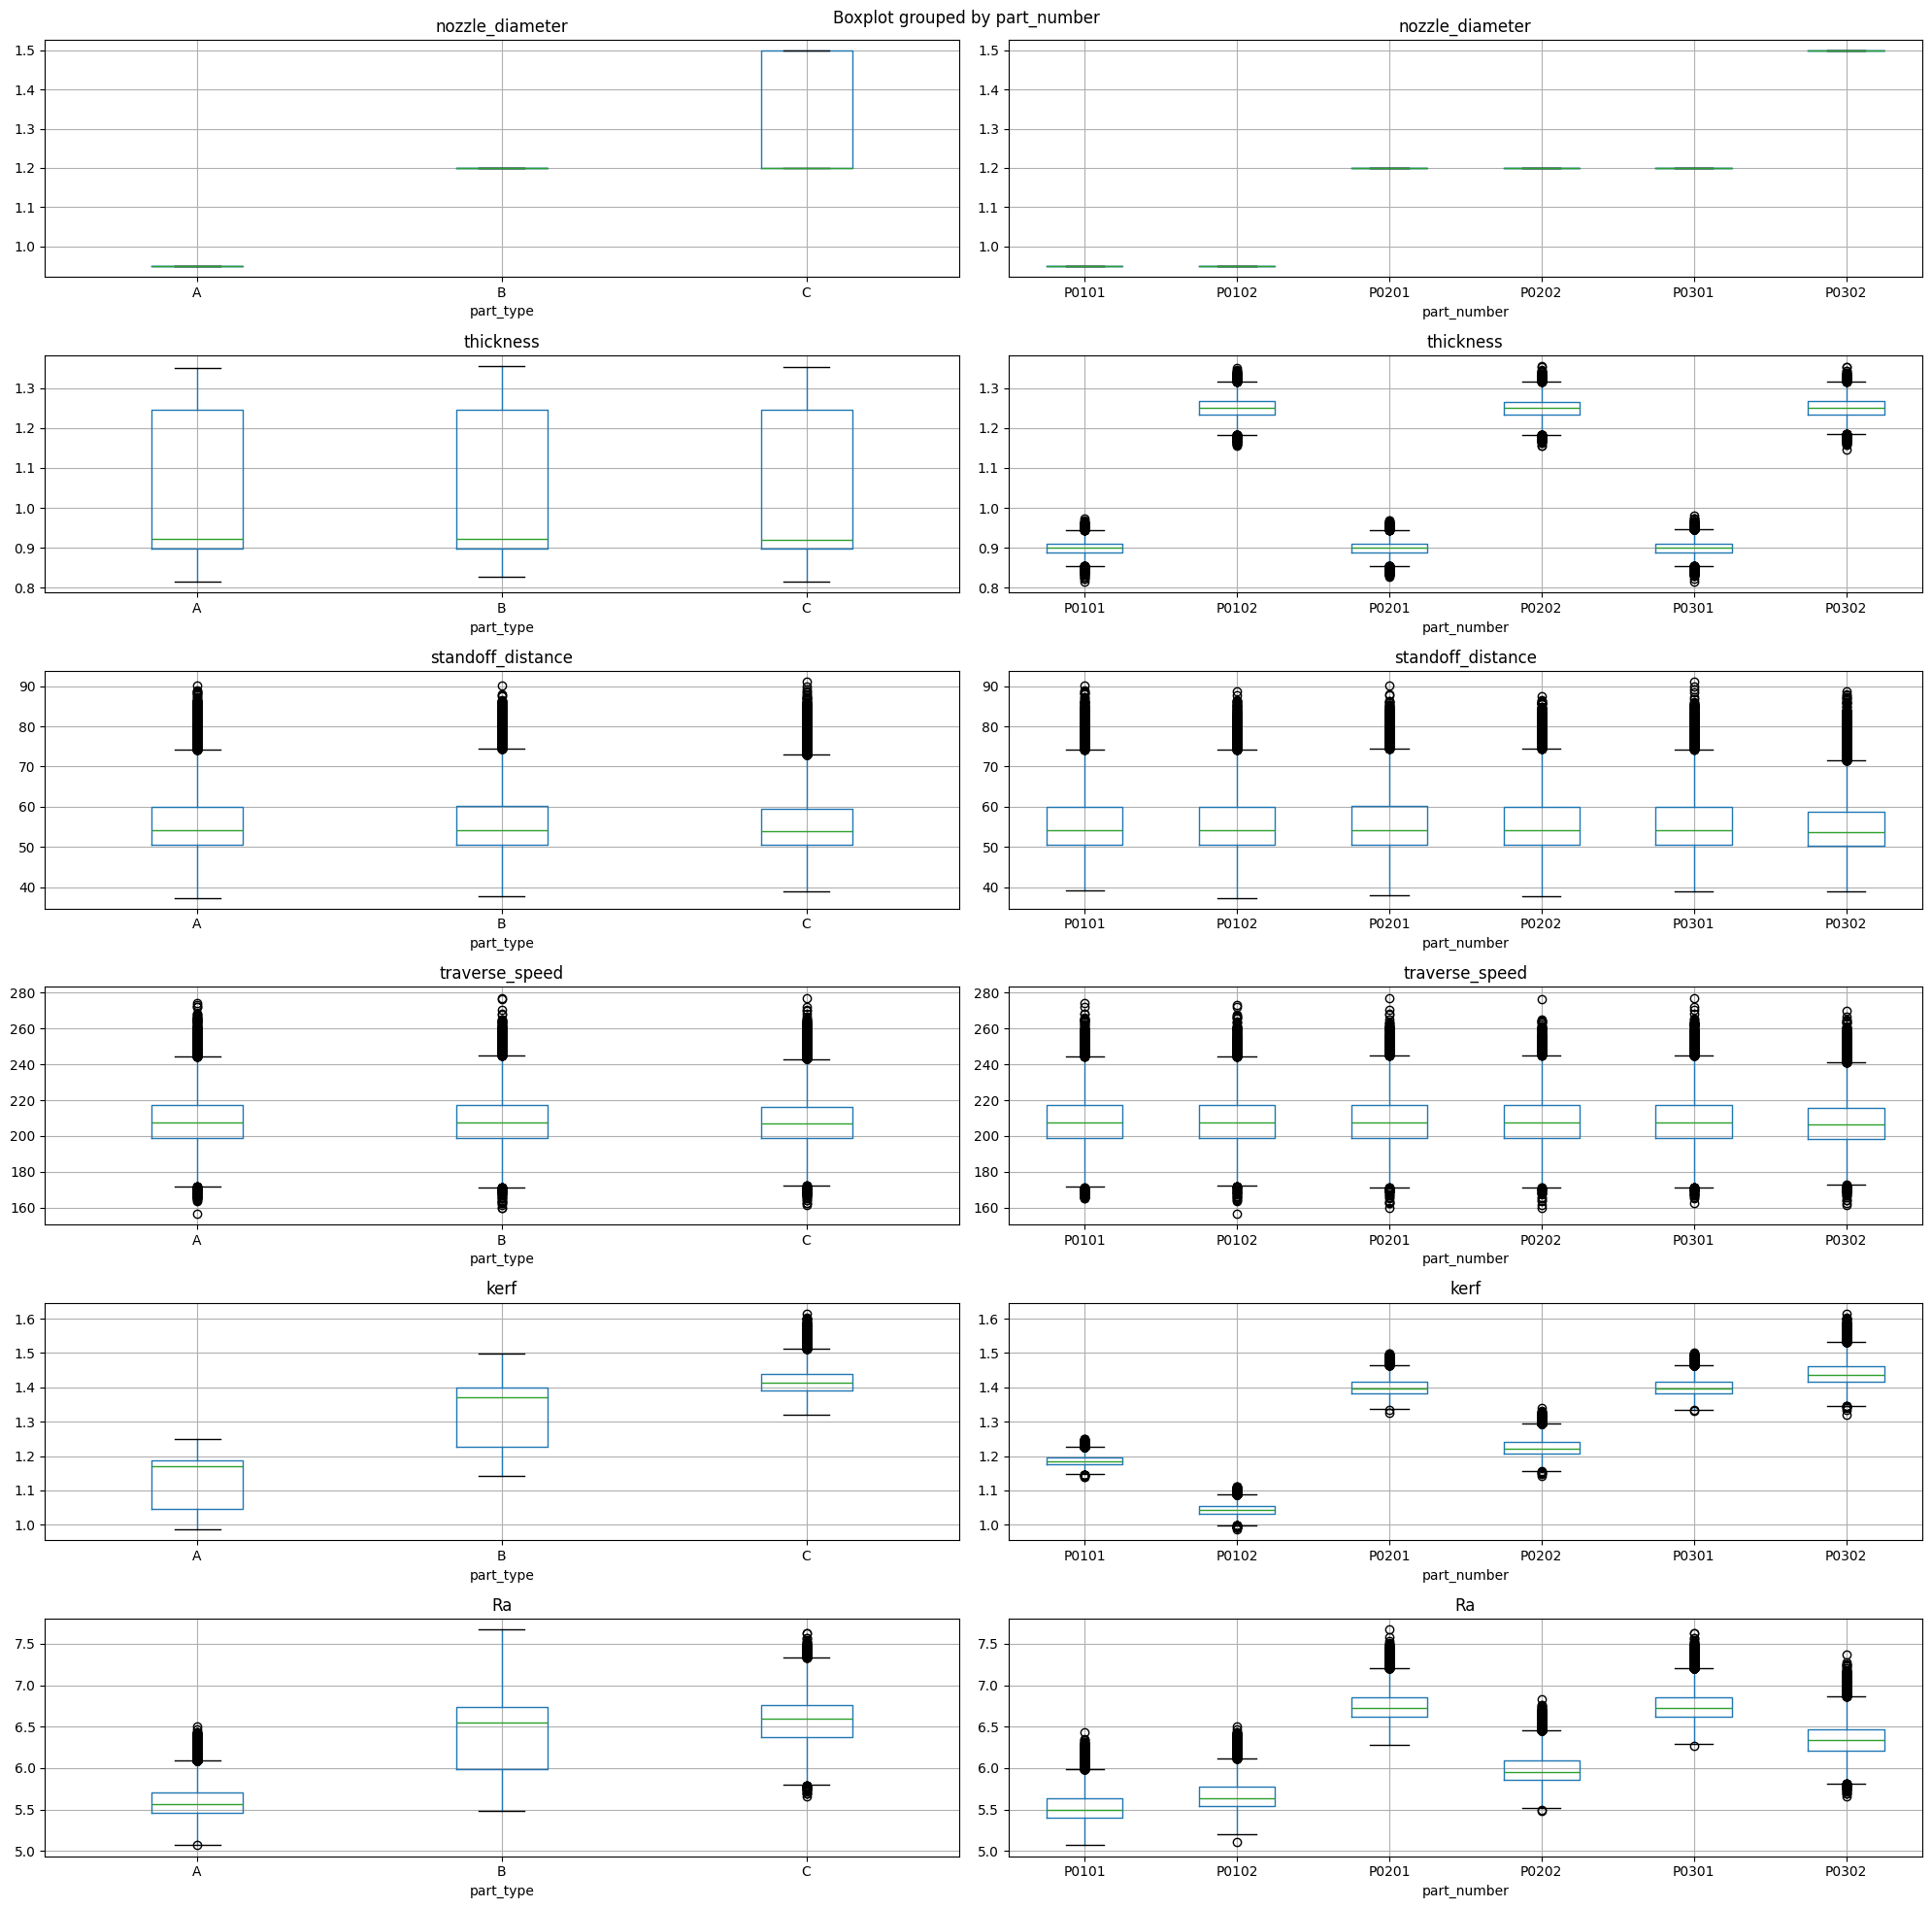

In [28]:
# To get further knowledge of the data we do the same as before for the part types and the parts itself
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(20, 20))
for i in range(6):
  df.boxplot(column=numeric_columns[i], by='part_type', ax=ax[i, 0])
  df.boxplot(column=numeric_columns[i], by='part_number', ax=ax[i, 1])

plt.tight_layout()

**Main Results**
* Across part type and part the standoff difference and the traverse speed remains unchanged
* From the plot the distinct nozzle diameters of the products can be derived
* From those plot it seems like a wider nozzle and a wider kerf have a slightly negative effect on the surface quality of the cut
* What stands out that a wider nozzle not always fits the resulting kerf e.g. P302 has the widest nozzle but only a slightly wider kerf as P301.Additionally, products made from the second material have a lower kerf for the same standoff distance compared to material 1

**For a deeper analysis I would like to investigate 4 questions:**
1. What are determinats for the traverse speed?
2. What are determinants for the difference in nozzle diameter and actual kerf?
3. What affects the quality of the cut?
4. Does the day of production explain any variation in kerf, surface quality of the cut and the difference between nozzle diameter and kerf?

##### 5.1 What are determinants for the traverse speed

Text(0.5, 1.0, 'Relation between Standoff Distance and Traverse Speed')

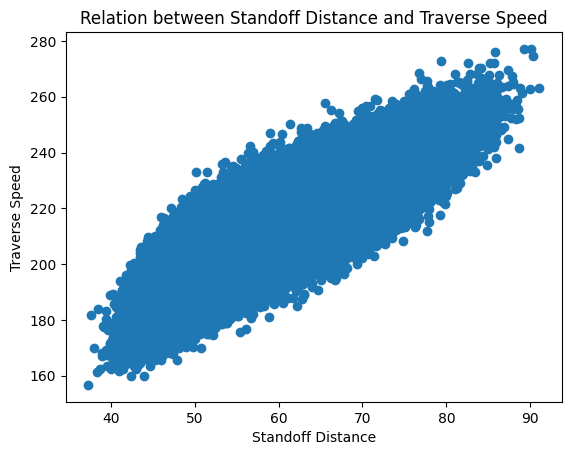

In [29]:
#Relation between the standoff distance and the traverse speed
fig, ax = plt.subplots()

plt.scatter(df.standoff_distance, df.traverse_speed)
ax.set_ylabel('Traverse Speed')
ax.set_xlabel('Standoff Distance')
ax.set_title('Relation between Standoff Distance and Traverse Speed')

We can see a positive relationship between the standoff distance and the traverse speed

Text(0.5, 1.0, 'Relation between the Thickness of the metal and the Traverse Speed')

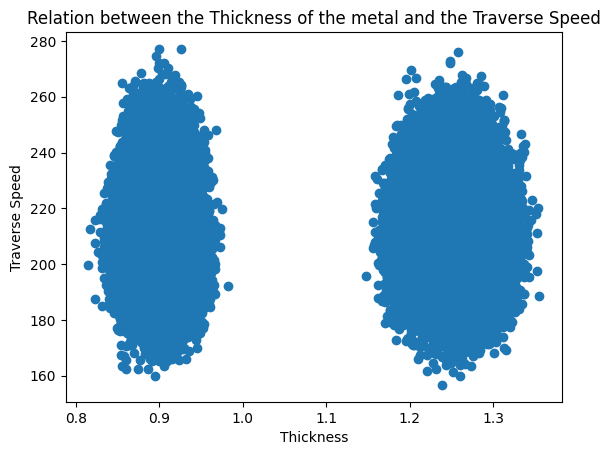

In [30]:
#Relation between the material thickness and the traverse speed
fig, ax = plt.subplots()

plt.scatter(df.thickness, df.traverse_speed)
ax.set_ylabel('Traverse Speed')
ax.set_xlabel('Thickness')
ax.set_title('Relation between the Thickness of the metal and the Traverse Speed')

The thickness of the material does not affect the traverse speed

Text(0.5, 1.0, 'Relation between the Nozzle Diameter and the Traverse Speed')

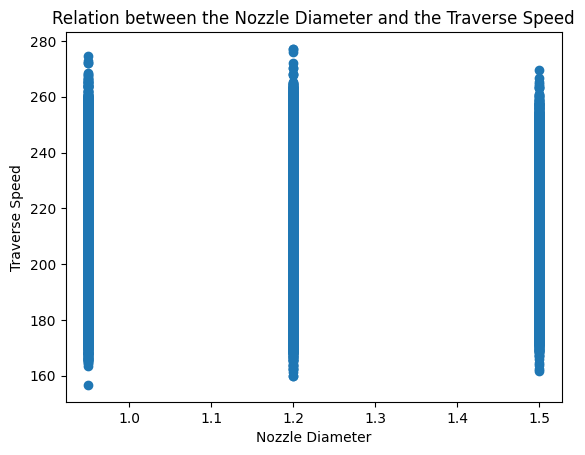

In [31]:
#Relation bewtween the nozzle diameter and the traverse speed
fig, ax = plt.subplots()

plt.scatter(df.nozzle_diameter, df.traverse_speed)
ax.set_ylabel('Traverse Speed')
ax.set_xlabel('Nozzle Diameter')
ax.set_title('Relation between the Nozzle Diameter and the Traverse Speed')

The nozzle diameter has no influence in the traverse speed

**Main Results**
* The Standoff Distance is the only real determinant of the traverse speed
* A higher standoff distance does enable a higher traverse speed
* As we have seen before, a similar traverse speed is used for each part and material

##### 5.2 What are determinants for the difference in nozzle diameter and actual kerf?

In the initial analysis we recognized that there might be an effect that increases the difference between the nozzle diameter and the resulting kerf

In [32]:
#Adding a new column to the dataset including the difference between kerf and the nozzle diameter
df.loc[:,'diff_kerf_nozzle'] = df.loc[:,'kerf'] - df.loc[:,'nozzle_diameter']
df.head()

,prod_day,part_type,material,part_number,nozzle_diameter,thickness,standoff_distance,traverse_speed,kerf,Ra,diff_kerf_nozzle
0,80,C,MTL2,P0302,1.5,1.242383,64.535438,225.001446,1.492346,6.611027,-0.007654
1,14,B,MTL2,P0202,1.2,1.280226,54.298252,209.966809,1.205351,5.897230,0.005351
2,39,C,MTL1,P0301,1.2,0.905913,50.878479,212.142485,1.379456,6.659806,0.179456
3,24,B,MTL2,P0202,1.2,1.280859,59.564727,211.835422,1.223526,5.998701,0.023526
4,22,C,MTL1,P0301,1.2,0.871954,58.572347,204.161588,1.426928,6.849167,0.226928


/var/folders/hv/5rn9tnkj70x5xkjrsjhdxj9w0000gn/T/ipykernel_78872/2082200372.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='best')


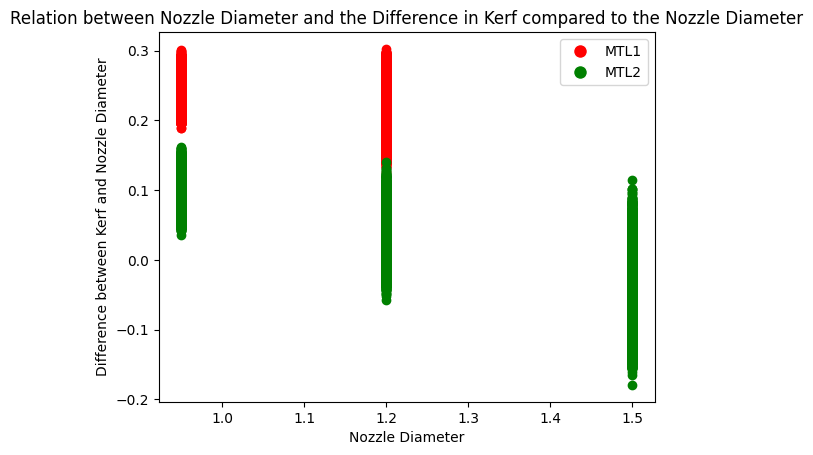

In [33]:
#Plotting the Nozzle Diameter and the difference in kerf compared to the nozzle diameter
fig, ax = plt.subplots()
plt.scatter(df.nozzle_diameter[df.material == "MTL1"], df.diff_kerf_nozzle[df.material == "MTL1"], color="red") #Coloring points where MTL1 is used red
plt.scatter(df.nozzle_diameter[df.material == "MTL2"], df.diff_kerf_nozzle[df.material == "MTL2"], color="green") #Coloring point where MTL2 is used green
ax.set_xlabel('Nozzle Diameter')
ax.set_ylabel('Difference between Kerf and Nozzle Diameter')
ax.set_title('Relation between Nozzle Diameter and the Difference in Kerf compared to the Nozzle Diameter')
ax.legend(loc='best')

from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='MTL1', markerfacecolor='red', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='MTL2', markerfacecolor='green', markersize=10)]

ax.legend(handles=legend_elements, loc='best')

We can see that the difference between nozzle diameter and kerf is higher for small nozzle diameters. Furthermore, we can see a clear distinction between the used materials. It is also noticable that there are negative values. This means in some cases the nozzle diameter is wider than the actual kerf.

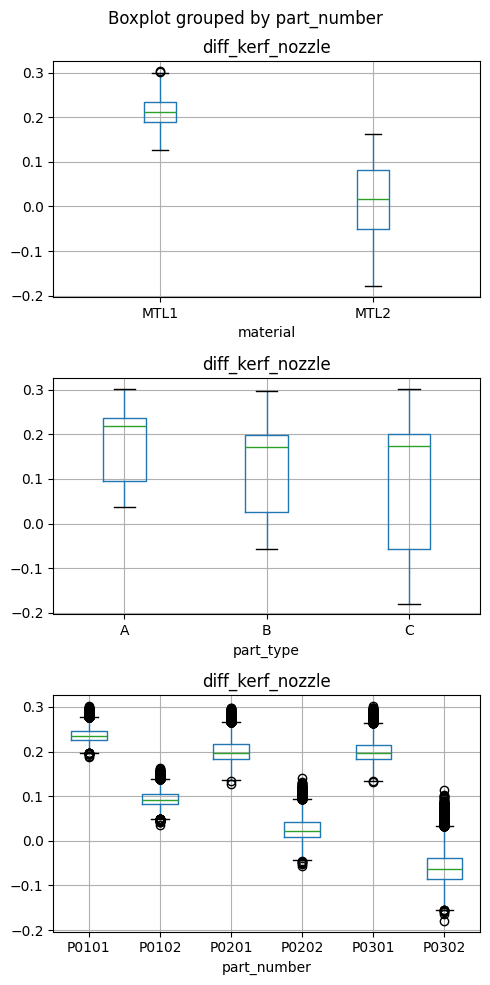

In [34]:
#creating boxplots of the difference in kerf and nozzle diameter, conditioned on material, part type and part number
fig, ax = plt.subplots(nrows=3, figsize=(5, 10))
df.boxplot(column='diff_kerf_nozzle', by='material', ax=ax[0])
df.boxplot(column='diff_kerf_nozzle', by='part_type', ax=ax[1])
df.boxplot(column='diff_kerf_nozzle', by='part_number', ax=ax[2])

plt.tight_layout()

This solidifies the observation that a the difference between nozzle diameter and kerf is higher when using MTL1. Due to this fact the difference for parts P0101, P0201 and P0301 is higher, since they are using MTL1. It must be analyzed if that is due to the material or due to other factors like the traverse speed or the standoff distance. The plot also shows that for Material P302 a nozzle is used that created as smaller kerf than nozzle diameter

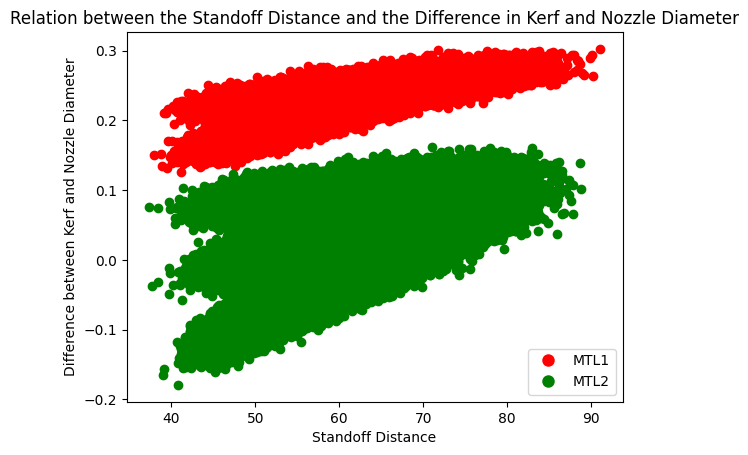

In [35]:
# Plotting the standoff difference againts the difference of kerf and nozzle diameter
fig, ax = plt.subplots()

ax.scatter(x=df.standoff_distance[df.material=='MTL1'], y=df.diff_kerf_nozzle[df.material=='MTL1'], color='red') #Entries of MTL 1 are colored red
ax.scatter(x=df.standoff_distance[df.material=='MTL2'], y=df.diff_kerf_nozzle[df.material=='MTL2'], color='green') #Entries of MTL 2 are colored green
ax.set_xlabel('Standoff Distance')
ax.set_ylabel('Difference between Kerf and Nozzle Diameter')
ax.set_title('Relation between the Standoff Distance and the Difference in Kerf and Nozzle Diameter')
ax.legend(handles=legend_elements, loc='best')


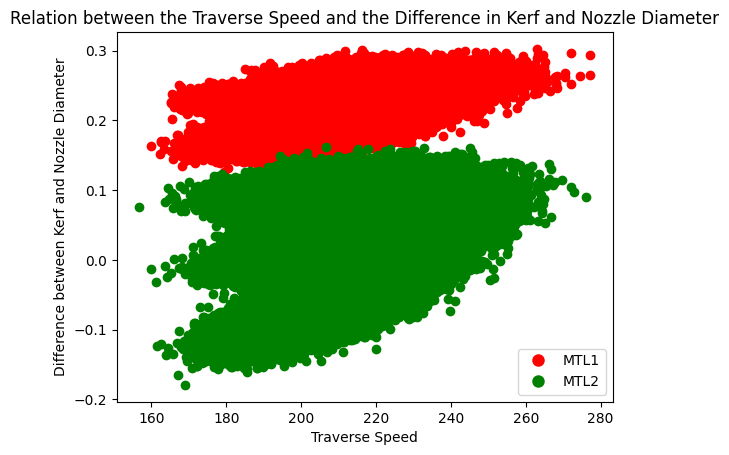

In [36]:
# Plotting the traverse speed againts the difference of kerf and nozzle diameter
fig, ax = plt.subplots()

ax.scatter(x=df.traverse_speed[df.material=='MTL1'], y=df.diff_kerf_nozzle[df.material=='MTL1'], color='red') #Entries of MTL 1 are colored red
ax.scatter(x=df.traverse_speed[df.material=='MTL2'], y=df.diff_kerf_nozzle[df.material=='MTL2'], color='green') #Entries of MTL 2 are colored green
ax.set_xlabel('Traverse Speed')
ax.set_ylabel('Difference between Kerf and Nozzle Diameter')
ax.set_title('Relation between the Traverse Speed and the Difference in Kerf and Nozzle Diameter')
ax.legend(handles=legend_elements, loc='best')

We can clearly see that the traverse speed and the standoff distance affect the difference in kerf and nozzle diameter. But there is also a clear distinction between the two materials. To check if the choice of material has an effect on the difference we must check if the traverse speed and the standoff distance are equally distributed for both materials

Text(0.5, 1.0, 'Distribution of the Traverse Speed')

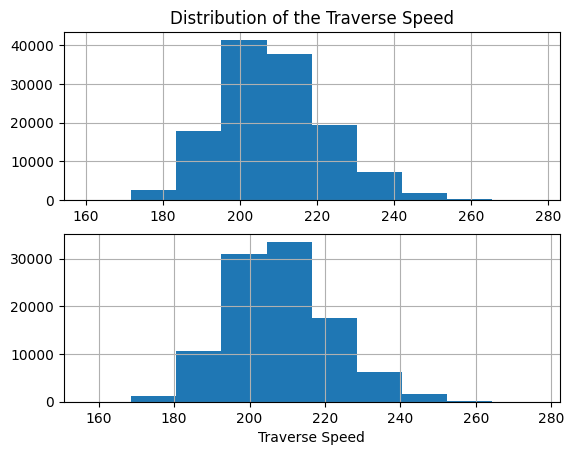

In [37]:
#Checking if the traverse speed is differenctly distributed for the two materials
df_mtl1 = df.loc[df.material == 'MTL1']
df_mtl2 = df.loc[df.material == 'MTL2']

fig, ax = plt.subplots(nrows=2)
df_mtl1.traverse_speed.hist(ax = ax[0])
df_mtl2.traverse_speed.hist(ax = ax[1])
ax[1].set_xlabel('Traverse Speed')
ax[0].set_title('Distribution of the Traverse Speed')

(30.0, 90.0)

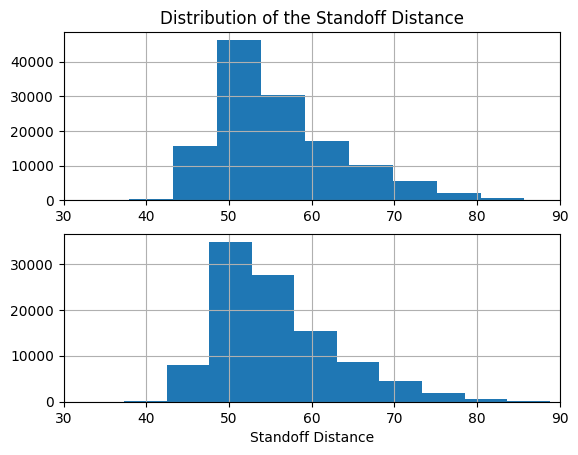

In [38]:
#Checking if the standoff distance is differenctly distributed for the two materials
fig, ax = plt.subplots(nrows=2)
df_mtl1.standoff_distance.hist(ax = ax[0])
df_mtl2.standoff_distance.hist(ax = ax[1])
ax[0].set_title('Distribution of the Standoff Distance')
ax[1].set_xlabel('Standoff Distance')
ax[0].set_xlim(30, 90) #Setting x-limits for both histograms for easier comparison
ax[1].set_xlim(30, 90)

**Main Results**
* The difference between the nozzle diameter and the kerf is caused by the nozzle diameter, the standoff distance and traverse speed
* The choice of material seems to have an effect on this difference as well, since the yield different results for the same distribution of standoff distande and traverse speed.
* The difference is higher when material MTL1 was used
* The cause of the effect in the choice of material should be investigated

##### 5.3 What affects the quality of the cut?

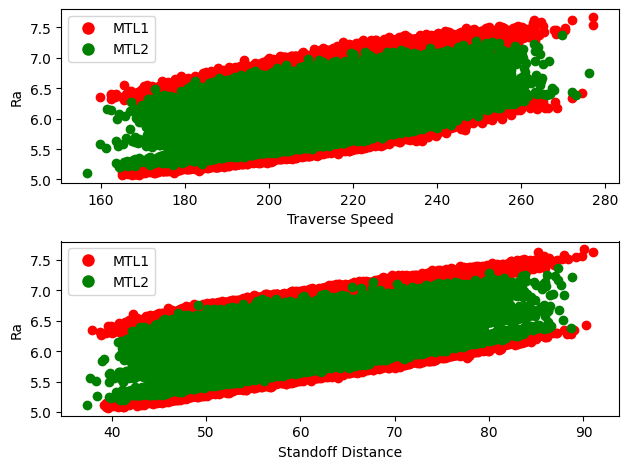

In [40]:
# Analyzing the influence of the traverse speed and the standoff distance on the quality of cut
fig, ax = plt.subplots(nrows=2)

ax[0].scatter(df_mtl1.traverse_speed, df_mtl1.Ra, color='red') #Plotting datapoints of material MTL1 in red
ax[0].scatter(df_mtl2.traverse_speed, df_mtl2.Ra, color='green') #Plotting datapoints of material MTL2 in green
ax[0].set_xlabel('Traverse Speed')
ax[0].set_ylabel('Ra')
ax[0].legend(handles=legend_elements, loc='best')

ax[1].scatter(df_mtl1.standoff_distance, df_mtl1.Ra, color='red')
ax[1].scatter(df_mtl2.standoff_distance, df_mtl2.Ra, color='green')
ax[1].set_xlabel('Standoff Distance')
ax[1].set_ylabel('Ra')
ax[1].legend(handles=legend_elements, loc='best')

plt.tight_layout()

A higher tranverse Speed and Standoff Distance have a negative effect in the quality of the cut surface. The choise of material again seems to have an impact on the qualtity of the cut surface of some parts

Text(0.5, 1.0, 'Distributions of Ra for the two materials')

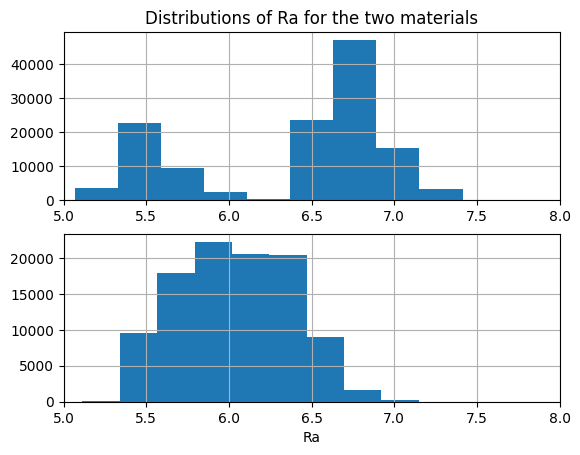

In [41]:
#Drilling down on the effect of material on Ra
fig, ax = plt.subplots(nrows=2)

df_mtl1.Ra.hist(ax = ax[0])
df_mtl2.Ra.hist(ax = ax[1])
ax[0].set_xlim(5, 8)
ax[1].set_xlim(5, 8)
ax[1].set_xlabel('Ra')
ax[0].set_title('Distributions of Ra for the two materials')

For MTL1 two spikes can be observed, while the quality of surface of cut for MTL2 is more consistent

In [42]:
df_mtl1[df.Ra > 6.25].part_number.value_counts() #Explore which products of material MTL1 have bad quality of cut

/var/folders/hv/5rn9tnkj70x5xkjrsjhdxj9w0000gn/T/ipykernel_78872/1539354375.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_mtl1[df.Ra > 6.25].part_number.value_counts() #Explore which products of material MTL1 have bad quality of cut


part_number
P0301    52528
P0201    37033
P0101       29
Name: count, dtype: int64

In [43]:
df_mtl1[df.Ra <= 6.25].part_number.value_counts() #Explore which products of material MTL1 have good quality of cut

/var/folders/hv/5rn9tnkj70x5xkjrsjhdxj9w0000gn/T/ipykernel_78872/1345323618.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_mtl1[df.Ra <= 6.25].part_number.value_counts() #Explore which products of material MTL1 have good quality of cut


part_number
P0101    38508
Name: count, dtype: int64

For parts P0301 and P0202 there seems so be a worse quality of cut when using MTL1 compared to other parts. In contrast the quality of cut is higher for P0101 when using MTL1 compared to the other parts with MTL2. P101 corresponds to part type A

**Main Results**
* A lower traverse speed and standoff distance yield a higher quality of cut
* P0101 yields a good quality of cut, when using material MTL1 while P0301 and P0201 return a lower quality of cut. The quality of cut is more consistent when using MTL2
* In respect to Ra the choice of material for the different parts is important

##### 5.4 Does the day of production explain any variation in kerf and surface quality of the cut?

I want to find out if there were any periods where the performance measures are better or worse than normal

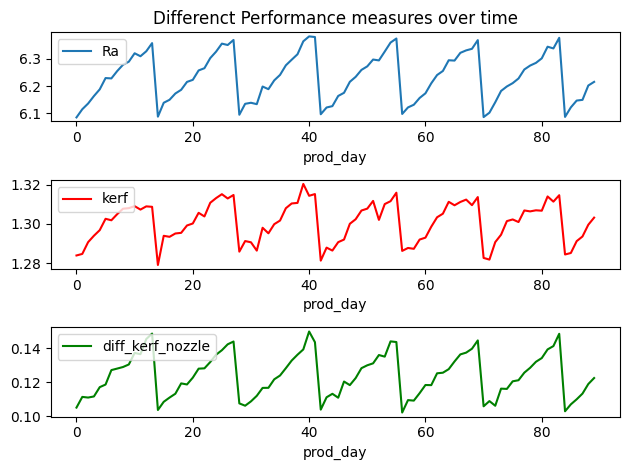

In [44]:
#Pivot the table to group on the day of production
pivoted_table = pd.pivot_table(df, values=['Ra', 'kerf', 'diff_kerf_nozzle'], index='prod_day', aggfunc='mean')

fig, ax = plt.subplots(nrows=3)
#Plot the means of Ra, kerf and difference between kerf and nozzle diameter on the time
pivoted_table.plot(y='Ra', use_index=True, ax=ax[0])
pivoted_table.plot(y='kerf', use_index=True, ax=ax[1], color='red')
pivoted_table.plot(y='diff_kerf_nozzle', use_index=True, ax=ax[2], color='green')

ax[0].set_title('Differenct Performance measures over time')
plt.tight_layout()

There are periodic spikes and heavy drops in the Ra, kerf and the difference in kerf and nozzle diameter

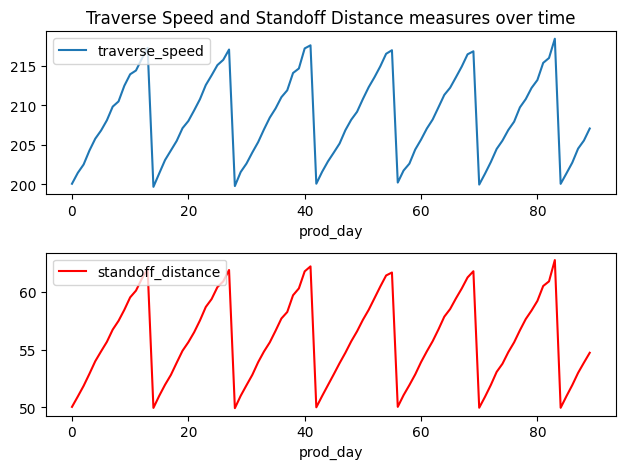

In [45]:
#Check if traverse speed and standoff distance have same pattern, since they affect Ra, kerf and the difference in nozzle diameter and kerf
pivoted_table = pd.pivot_table(df, values=['traverse_speed', 'standoff_distance'], index='prod_day', aggfunc='mean')

fig, ax = plt.subplots(nrows=2)
#Plot the means of Ra, kerf and difference between kerf and nozzle diameter on the time
pivoted_table.plot(y='traverse_speed', use_index=True, ax=ax[0])
pivoted_table.plot(y='standoff_distance', use_index=True, ax=ax[1], color='red')

ax[0].set_title('Traverse Speed and Standoff Distance measures over time')
plt.tight_layout()

The spikes of the traverse speed and standoff distance over time match those of the performance measure

**Main Results**
* There is a clear pattern (spikes) in Ra, kerf and the difference in nozzle diameter and kerf over time
* The pattern over time of the traverse speed and standoff distance matches the pattern of the three performance measures
* Since we have already found out that traverse speed and standoff distance affect the three measures this makes sence
* The amount of cut material or part over time does not explain any of the pattern
* It should be investigated by the company why the traverse speed and the standoff distance varies over time (maybe investigate external factors)